<a href="https://colab.research.google.com/github/chrisfeltner/feltner-cop4630/blob/master/HW2/ChristopherFeltnerHomework2Problem1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Homework Two
##Problem One
##Christopher Feltner

###Simple model with a single dense layer and no handcrafted features

In [8]:
from keras import models
from keras import layers
from keras.datasets import mnist
from keras.utils import to_categorical

(train_data, train_labels), (test_data, test_labels) = mnist.load_data()
train_data_reshaped = train_data.reshape(60000, 28*28)
train_data_reshaped = train_data_reshaped.astype('float32') / 255

train_labels = to_categorical(train_labels)

test_data_reshaped = test_data.reshape(10000, 28*28)
test_data_reshaped = test_data_reshaped.astype('float32') / 255

test_labels = to_categorical(test_labels)

model = models.Sequential(name='Simple Softmax Model')
model.add(layers.Dense(10, activation='softmax', input_shape=(784,)))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', 
              metrics=['accuracy'])

history = model.fit(train_data_reshaped, train_labels, epochs=5, 
                    batch_size=128, 
                    validation_data=(test_data_reshaped, test_labels))
test_loss, test_acc = model.evaluate(test_data_reshaped, test_labels)
print('test_acc: ', test_acc)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 2s 38us/step - loss: 0.6039 - acc: 0.8503 - val_loss: 0.3441 - val_acc: 0.9053
Epoch 2/5
60000/60000 [==============================] - 2s 34us/step - loss: 0.3313 - acc: 0.9081 - val_loss: 0.3013 - val_acc: 0.9163
Epoch 3/5
60000/60000 [==============================] - 2s 35us/step - loss: 0.3019 - acc: 0.9157 - val_loss: 0.2865 - val_acc: 0.9205
Epoch 4/5
60000/60000 [==============================] - 2s 35us/step - loss: 0.2888 - acc: 0.9194 - val_loss: 0.2796 - val_acc: 0.9232
Epoch 5/5
10000/10000 [==============================] - 1s 52us/step
test_acc:  0.9241


###Results

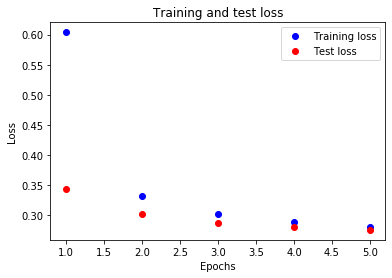

In [9]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, 6)

import matplotlib.pyplot as plt

plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

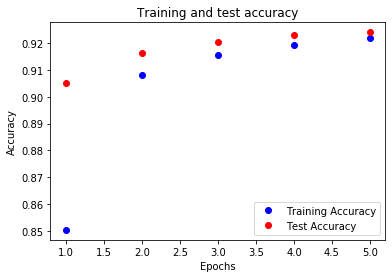

In [10]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']
epochs_range = range(1, 6)

plt.plot(epochs_range, acc_values, 'bo', label='Training Accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test Accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

###Calculating Handcrafted Features

In [11]:
import numpy as np

handcrafted_features_train = np.zeros((60000, 5))
handcrafted_features_test = np.zeros((10000, 5))

def getImageWidth(image):
  min_left = 27
  max_right = 0
  for i in range(28):
    for j in range(28):
      if(image[i][j] != 0 and j < min_left):
        min_left = j
        break
      if(image[i][27 - j] != 0 and 27 - j > max_right):
        max_right = 27 - j
        break
  return (max_right - min_left + 1) / 28

def getImageHeight(image):
  min_top = 27
  max_bottom = 0
  for i in range(28):
    for j in range(28):
      if(image[j][i] != 0 and j < min_top):
        min_top = j
      if(image[27 - j][i] != 0 and 27 - j > max_bottom):
        max_bottom = 27 - j
  return (max_bottom - min_top + 1) / 28

def getIndependentWhiteRegions(image):
  visited = np.zeros((28, 28))
  components = 0
  def traverse(image, visited, i, j):
    if(image[i][j] == 0):
      visited[i][j] = 1
      if(i + 1 < 28 and visited[i + 1][j] == 0 and image[i + 1][j] == 0):
        traverse(image, visited, i + 1, j)
      if(j + 1 < 28 and visited[i][j + 1] == 0 and image[i][j + 1] == 0):
        traverse(image, visited, i, j + 1)
      if(j - 1 >= 0 and visited[i][j - 1] == 0 and image[i][j - 1] == 0):
        traverse(image, visited, i, j - 1)
      if(i - 1 >= 0 and visited[i - 1][j] == 0 and image[i - 1][j] == 0):
        traverse(image, visited, i - 1, j)
  for i in range(28):
    for j in range(28):
      if(visited[i][j] == 0 and image[i][j] == 0):
        components = components + 1
        traverse(image, visited, i, j)
  return components

for i in range(len(test_data)):
  if(i % 1000 == 0):
    print("Getting handcrafted features for test group: ", i)
  white_regions = getIndependentWhiteRegions(test_data[i])
  handcrafted_features_test[i] = [getImageWidth(test_data[i]), 
                             getImageHeight(test_data[i]), 
                             white_regions == 1, 
                             white_regions == 2, white_regions == 3]

for i in range(len(train_data)):
  if(i % 1000 == 0):
    print("Getting handcrafted features for training group: ", i)
  white_regions = getIndependentWhiteRegions(train_data[i])
  handcrafted_features_train[i] = [getImageWidth(train_data[i]), 
                             getImageHeight(train_data[i]), 
                             white_regions == 1, white_regions == 2, 
                             white_regions == 3]

Getting handcrafted features for test group:  0
Getting handcrafted features for test group:  1000
Getting handcrafted features for test group:  2000
Getting handcrafted features for test group:  3000
Getting handcrafted features for test group:  4000
Getting handcrafted features for test group:  5000
Getting handcrafted features for test group:  6000
Getting handcrafted features for test group:  7000
Getting handcrafted features for test group:  8000
Getting handcrafted features for test group:  9000
Getting handcrafted features for training group:  0
Getting handcrafted features for training group:  1000
Getting handcrafted features for training group:  2000
Getting handcrafted features for training group:  3000
Getting handcrafted features for training group:  4000
Getting handcrafted features for training group:  5000
Getting handcrafted features for training group:  6000
Getting handcrafted features for training group:  7000
Getting handcrafted features for training group:  8000
G

##Model with handcrafted features

In [13]:
train_data_handcrafted = np.concatenate((train_data_reshaped, handcrafted_features_train), axis=1)
test_data_handcrafted = np.concatenate((test_data_reshaped, handcrafted_features_test), axis=1)

handcrafted_model = models.Sequential(name="Model with Handcrafted Features")

handcrafted_model.add(layers.Dense(10, activation='softmax', input_shape=(789,)))

handcrafted_model.compile(optimizer='rmsprop', loss='categorical_crossentropy', 
              metrics=['accuracy'])

history = handcrafted_model.fit(train_data_handcrafted, train_labels, epochs=5, 
                    batch_size=128, 
                    validation_data=(test_data_handcrafted, test_labels))
test_loss, test_acc = handcrafted_model.evaluate(test_data_handcrafted, test_labels)
print('test_acc: ', test_acc)


Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 2s 41us/step - loss: 0.5721 - acc: 0.8628 - val_loss: 0.3021 - val_acc: 0.9202
Epoch 2/5
60000/60000 [==============================] - 2s 38us/step - loss: 0.2874 - acc: 0.9197 - val_loss: 0.2583 - val_acc: 0.9286
Epoch 3/5
60000/60000 [==============================] - 2s 37us/step - loss: 0.2550 - acc: 0.9276 - val_loss: 0.2415 - val_acc: 0.9316
Epoch 4/5
60000/60000 [==============================] - 2s 38us/step - loss: 0.2405 - acc: 0.9311 - val_loss: 0.2335 - val_acc: 0.9339
Epoch 5/5
10000/10000 [==============================] - 1s 55us/step
test_acc:  0.9349


### Handcrafted features model results

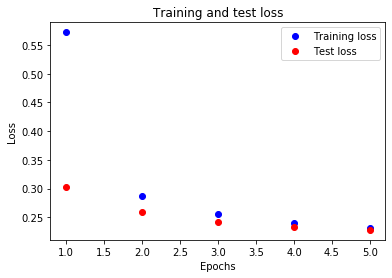

In [14]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, 6)

plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

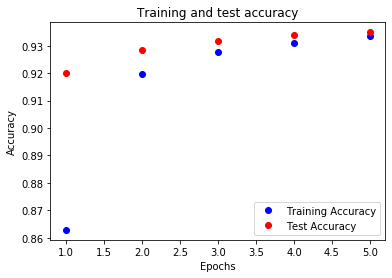

In [15]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']
epochs_range = range(1, 6)

plt.plot(epochs_range, acc_values, 'bo', label='Training Accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test Accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()